TITANIC DATASET ANALYSIS

In [209]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [242]:
df_titanic = pd.read_csv("../Datasets/titanic/train.csv")

In [394]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Sex       891 non-null    int64
 3   Age       891 non-null    int64
 4   SibSp     891 non-null    int64
 5   Parch     891 non-null    int64
dtypes: int64(6)
memory usage: 41.9 KB


In [200]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [339]:
df_titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64

In [244]:
#Convertimos el tipo de dato a numerico binario
tmp_values = {"Sex": {'male':0,'female':1}} #Male:0 Female:1
df_titanic.replace(tmp_values, inplace=True)
df_titanic['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [234]:
#Fill values with mean
age_mean = df_titanic['Age'].mean()
df_titanic['Age']=df_titanic['Age'].fillna(age_mean)

In [246]:
#Fill values depending on another variable
df_titanic['Age']=df_titanic['Age'].fillna(0)
women = df_titanic[df_titanic['Sex']==1]
men = df_titanic[df_titanic['Sex']==0]

def imputage(age, sex):
    if age==0 and sex==0:
        age = men['Age'].mean()
    elif age==0 and sex==1:
        age = women['Age'].mean()
    return age

df_titanic['Age'] = df_titanic.apply(lambda x: imputage(x['Age'], x['Sex']), axis=1)

In [392]:
df_titanic['Age'] = df_titanic['Age'].round()
df_titanic['Age'] = df_titanic['Age'].astype('int64')

<AxesSubplot:>

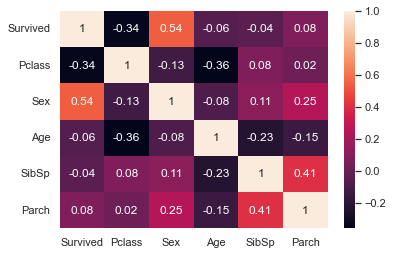

In [395]:
correlation_matrix = df_titanic.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True)

In [ ]:
df_titanic = df_titanic.drop(columns = ['Name','PassengerId','Embarked','Cabin','Fare','Ticket'])

C:\Users\Nicolas Carreno\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Male')

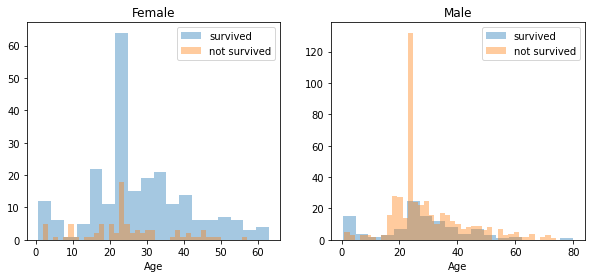

In [250]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
men = df_titanic[df_titanic['Sex']==0]
women = df_titanic[df_titanic['Sex']==1]
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')

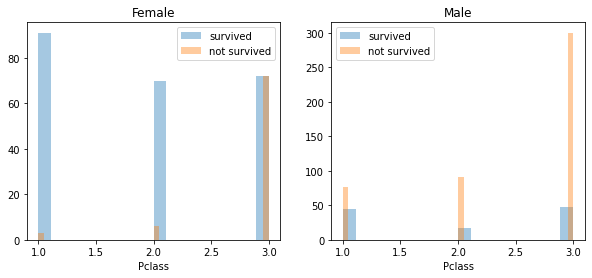

In [251]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
men = df_titanic[df_titanic['Sex']==0]
women = df_titanic[df_titanic['Sex']==1]
ax = sns.distplot(women[women['Survived']==1].Pclass, bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Pclass, bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Pclass, bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Pclass, bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

0    0.616162
1    0.383838
Name: Survived, dtype: float64


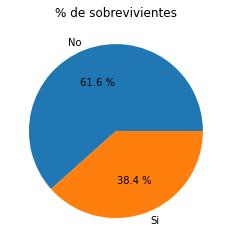

In [252]:
datos = df_titanic.Survived.value_counts(normalize=True)
print(datos)
plt.pie(datos, labels=["No","Si"], autopct="%0.1f %%")
plt.title("% de sobrevivientes")
plt.show()

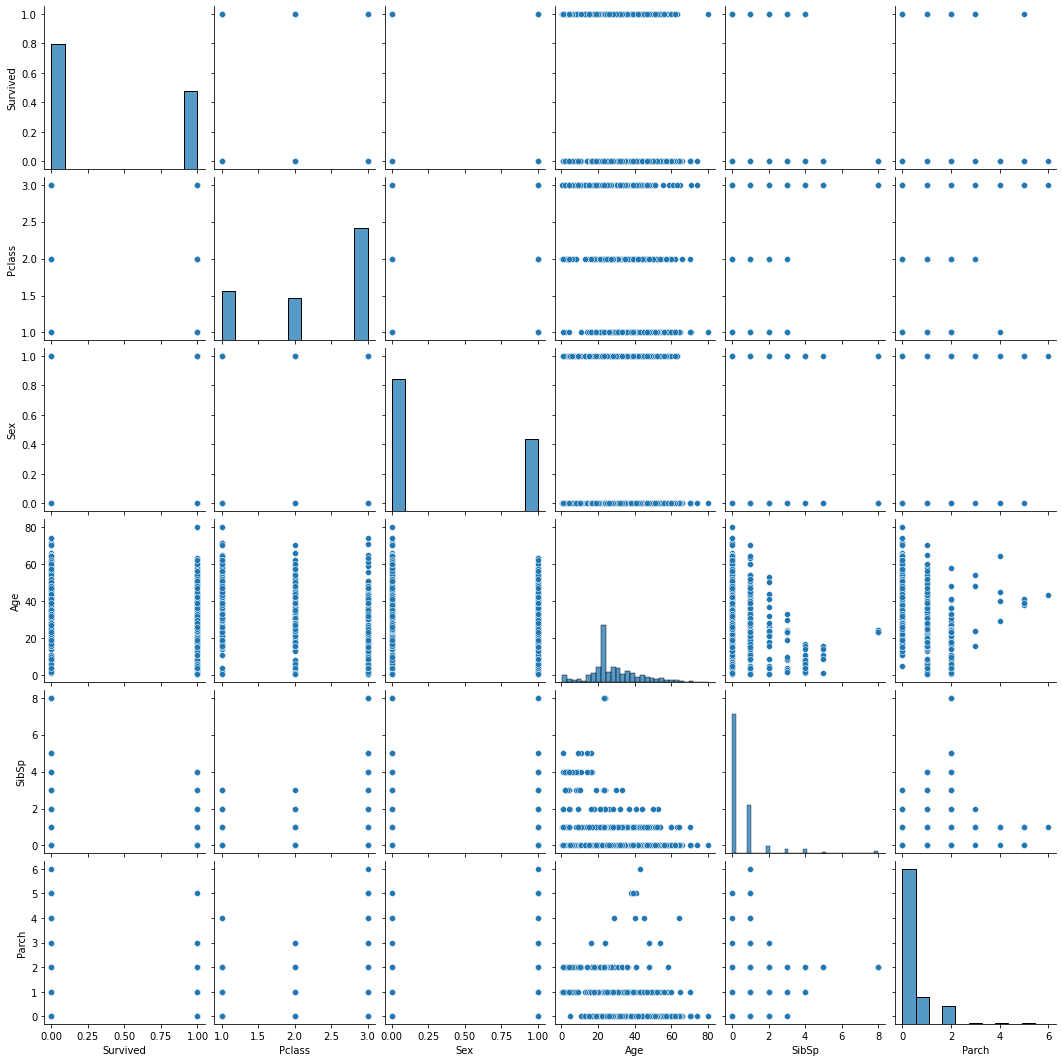

In [253]:
sns.pairplot(df_titanic)

# Regresion Logistica

In [342]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

logRegr = LogisticRegression()

In [405]:
x = df_titanic.drop(columns=['Survived'])
y = df_titanic['Survived']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [423]:
logRegr.fit(x_train,y_train)
y_pred = logRegr.predict(x_test)
print("Model score: ", logRegr.score(x_train,y_train).round(2))

Model score:  0.8


[[129  24]
 [ 34  81]]


<AxesSubplot:>

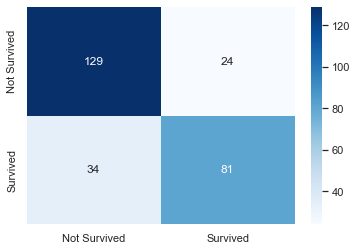

In [408]:
from sklearn.metrics import confusion_matrix
conf_mtrx = confusion_matrix(y_test,y_pred)
print(conf_mtrx)

group_names = ['True Neg', 'False Pos', 'False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_mtrx.flatten()]
group_percentages = ["{0:.2f}".format(value) for value in conf_mtrx.flatten()/np.sum(conf_mtrx)]

labels = [f"{v1}\n{v2}\n{v3}" for v1,v2,v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

class_names = ['Not Survived', 'Survived']
dataf = pd.DataFrame(conf_mtrx,index=class_names, columns=class_names)
sns.heatmap(dataf,annot=True,fmt='',cmap='Blues')

# Arbol de decision

In [422]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 13, random_state = 2)
tree.fit(x_train,y_train)
y_pred = tree.predict(x_test)
print("Decision Tree Model Precission",tree.score(x_train,y_train).round(2))

Decision Tree Model Precission 0.94


# Support Vector Machine

In [421]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(x_train,y_train)
y_pred = svc_model.predict(x_test)
print("SVC Model Precission",svc_model.score(x_train,y_train).round(2))

SVC Model Precission 0.67


# KNN Neighbors Classifier

In [420]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train,y_train)
y_pred = knn_model.predict(x_test)
print("KNN Model Precission",knn_model.score(x_train,y_train).round(2))

KNN Model Precission 0.94


[[123  30]
 [ 37  78]]


<AxesSubplot:>

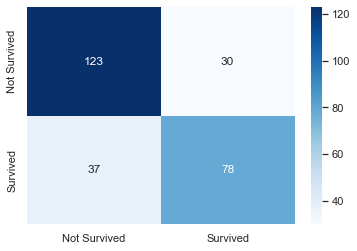

In [412]:
from sklearn.metrics import confusion_matrix
conf_mtrx = confusion_matrix(y_test,y_pred)
print(conf_mtrx)

group_names = ['True Neg', 'False Pos', 'False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in conf_mtrx.flatten()]
group_percentages = ["{0:.2f}".format(value) for value in conf_mtrx.flatten()/np.sum(conf_mtrx)]

labels = [f"{v1}\n{v2}\n{v3}" for v1,v2,v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

class_names = ['Not Survived', 'Survived']
dataf = pd.DataFrame(conf_mtrx,index=class_names, columns=class_names)
sns.heatmap(dataf,annot=True,fmt='',cmap='Blues')